# Zadanie nr 4 - Odległość edycyjna

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from spacy.lang.pl import Polish
from random import random

In [2]:
def print_2d(l): return print(
    '\n'.join(map(''.join, list(map(lambda x: str(x).replace("'", ""), l)))))

## 1. Odległość edycyjna
#### odległość Levensheita

<i>1. Zaimplementuj algorytm obliczania odległości edycyjnej w taki sposób, aby możliwe było określenie przynajmniej jednej sekwencji edycji (dodanie, usunięcie, zmiana znaku), która pozwala w minimalnej liczbie kroków, przekształcić jeden łańcuch w drugi. </i>

In [3]:
LEFT = '\u2190'
UP = '\u2191'
DIAG = '\u2196'

print(LEFT, UP, DIAG)

← ↑ ↖


In [4]:
def levensheit(text_a, text_b, delta=None):
    '''
    Znajduje odległość Levensheita dla tekstów text_a i text_b. 
    
    Zwraca tę odległość oraz pomocniczą tablicę dwuwymiarową 
    pozwalającą odtworzyć drogę uzyskania minimalnej liczby kroków, 
    przekształcając text_a w text_b.
    '''
    edit = [[None for _ in range(len(text_b) + 1)]
            for _ in range(len(text_a) + 1)]
    path = [[None for _ in range(len(text_b) + 1)]
            for _ in range(len(text_a) + 1)]

    if delta is None:
        def delta(char_a, char_b): return 0 if char_a == char_b else 1

    for i in range(len(text_a) + 1):
        edit[i][0] = i
        path[i][0] = UP

    for j in range(1, len(text_b) + 1):
        edit[0][j] = j
        path[0][j] = LEFT

    for i in range(1, len(text_a)+1):
        for j in range(1, len(text_b)+1):
            options = [edit[i-1][j] + 1, edit[i][j-1] + 1,
                       edit[i-1][j-1] + delta(text_a[i-1], text_b[j-1])]
            edit[i][j] = min(options)

            if edit[i][j] == options[0]:
                path[i][j] = UP
            elif edit[i][j] == options[1]:
                path[i][j] = LEFT
            else:
                path[i][j] = DIAG

    return edit[len(text_a)][len(text_b)], path

In [5]:
def get_steps(text_a, text_b, path=None):
    '''
        zwraca przykładową listę kroków,
        które przekształcają text_a w text_b
        
        lista zawiera także elementy ['next'],
        które nie są operacjami zamiany tekstu a w b,
        ale przydają się do wizualizacji krok po kroku
    '''
    if path is None:
        _, path = levensheit(text_a, text_b)
        
    i, j = len(text_a), len(text_b)
    steps = []

    while i > 0 or j > 0:
        if path[i][j] == LEFT:
            steps.append(['insert', text_b[j-1]])
            j -= 1
        elif path[i][j] == UP:
            steps.append(['delete', text_a[i-1]])
            i -= 1
        else:
            if text_a[i-1] != text_b[j-1]:
                steps.append(['replace', text_a[i-1], text_b[j-1]])
            else:
                steps.append(['next'])

            i -= 1
            j -= 1
            
    return steps[::-1]

In [6]:
dist, path = levensheit('los', 'kloc')
print('distance:', dist, '\n')
print_2d(path)

distance: 2 

[↑, ←, ←, ←, ←]
[↑, ↖, ↖, ←, ←]
[↑, ↑, ↑, ↖, ←]
[↑, ↑, ↑, ↑, ↖]


In [7]:
print(get_steps('los', 'kloc'))

[['insert', 'k'], ['next'], ['next'], ['replace', 's', 'c']]


<i>2. Na podstawie poprzedniego punktu zaimplementuj prostą wizualizację działania algorytmu, poprzez wskazanie kolejnych wersji pierwszego łańcucha, w których dokonywana jest określona zmiana. "Wizualizacja" może działać w trybie tekstowym. Np. zmiana łańcuch "los" w "kloc" może być zrealizowana następująco:</i> 
>\*k\*los (dodanie litery k) <br>
>klo\*c\* (zamiana s->c)

In [8]:
def transform(text_a, text_b, steps):
    '''
        zwraca listę tekstów pośrednich,
        powstałych po zastosowaniu kolejnych kroków
        transformacji
    '''
    i = 0
    cur = text_a
    states = [cur]

    for step in steps:
        if step[0] == 'insert':
            cur = cur[:i] + step[1] + cur[i:]
            states.append(f'{cur[:i]}*{cur[i]}*{cur[i+1:]}')
        elif step[0] == 'replace':
            cur = cur[:i] + step[2] + cur[i+1:]
            states.append(f'{cur[:i]}*{cur[i]}*{cur[i+1:]}')
        elif step[0] == 'delete':
            cur = cur[:i] + cur[i+1:] if i + \
                1 < len(cur) else cur[:i]
            states.append(f'{cur[:i]}**{cur[i:]}')
            i -= 1

        i += 1
        
    states.append(cur)
    return states

#### animacja

In [9]:
def animate(states):
    '''
        zwraca animację kolejnych słów z tablicy states
    '''
    fig, ax = plt.subplots(figsize=(8.5, 2))
    time_text = ax.text(0, 0.5, '', fontsize=40)
    plt.axis('off')

    def updatefig(num):
        time_text.set_text(states[num])
        return time_text,

    return animation.FuncAnimation(fig, updatefig, interval=500, frames=len(states))

<i> 3. Przedstaw wynik działania algorytmu z p. 2 dla następujących par łańcuchów: </i>
* los - kloc
* Łódź - Lodz
* kwintesencja - quintessence
* ATGAATCTTACCGCCTCG - ATGAGGCTCTGGCCCCTG

kwintesencja
*q*wintesencja
q*u*intesencja
quintes*s*encja
quintessenc*e*a
quintessence**
quintessence


<IPython.core.display.Javascript object>


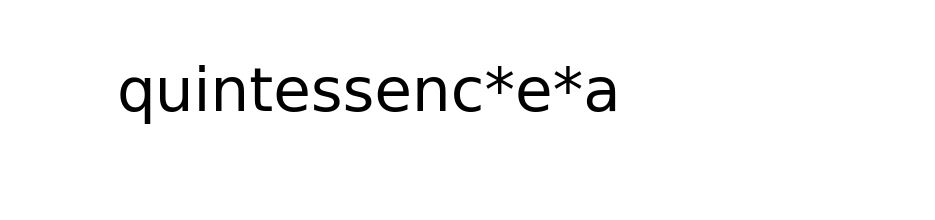

los
*k*los
klo*c*
kloc


<IPython.core.display.Javascript object>


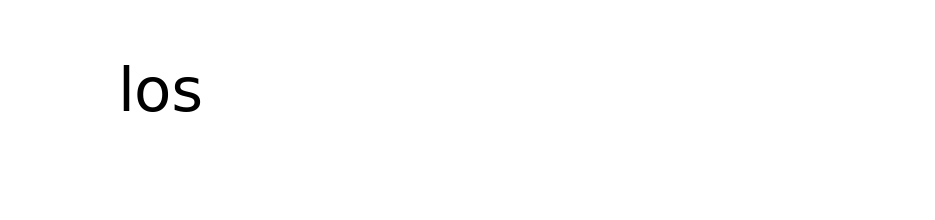

Łódź
*L*ódź
L*o*dź
Lod*z*
Lodz


<IPython.core.display.Javascript object>


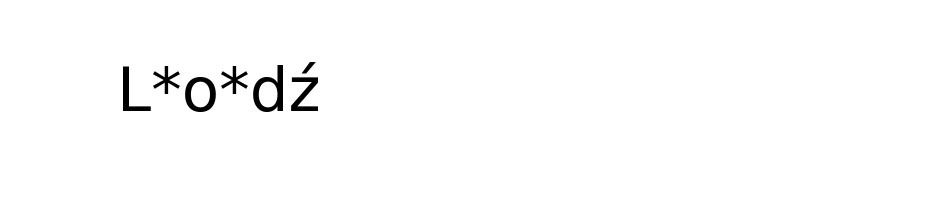

ATGAATCTTACCGCCTCG
ATGA*G*TCTTACCGCCTCG
ATGAG*G*CTTACCGCCTCG
ATGAGGCT*C*TACCGCCTCG
ATGAGGCTCT*G*CCGCCTCG
ATGAGGCTCTG*G*CCGCCTCG
ATGAGGCTCTGGCC**CCTCG
ATGAGGCTCTGGCCCCT**G
ATGAGGCTCTGGCCCCTG


<IPython.core.display.Javascript object>


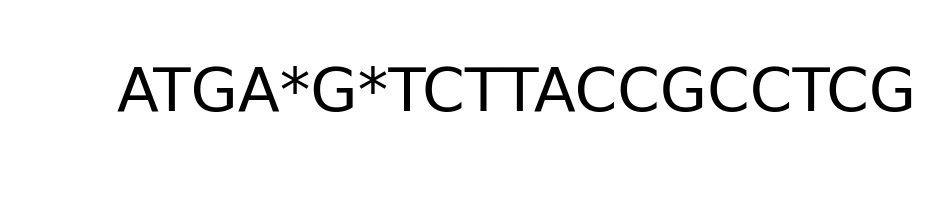

In [10]:
%matplotlib notebook

animated = []

for text_a, text_b in [("kwintesencja", "quintessence"), 
                       ("los", "kloc"), ("Łódź", "Lodz"), 
                       ("ATGAATCTTACCGCCTCG", "ATGAGGCTCTGGCCCCTG")]:
    states = transform(text_a, text_b, get_steps(text_a, text_b))
    print_2d(states)
    animated.append(animate(states))
    plt.draw()
    plt.show() 
    writergif = animation.PillowWriter(fps=1) 
    animated[-1].save(f'{text_a}.gif', writer=writergif)

## 2. Najdłuższy wspólny podciąg

<i>4. Zaimplementuj algorytm obliczania najdłuższego wspólnego podciągu dla pary ciągów elementów.</i>

In [11]:
def get_lcs(text_a, text_b):
    '''
        zwraca:
        * długość najdłuższego wspólnego podciągu słów text_a i text_b
        * przykładowy najdłuższy wspólny podciąg
        * tablicę krotek, gdzie oprócz wspólnych znaków należących do 
            najdłuższego wspólnego podciągu,
            zapisane są również indeksy w kolejno słowach text_a i text_b,
            pod którymi znajduje się znaki podciągu
    '''
    def delta(x, y): return 0 if str(x) == str(y) else 2
    dist, path = levensheit(text_a, text_b, delta)
    
    lcs_len = (len(text_a) + len(text_b) - dist)//2

    i, j = len(text_a), len(text_b)
    common = []

    while i > 0 or j > 0:
        if path[i][j] == LEFT:
            j -= 1
        elif path[i][j] == UP:
            i -= 1
        else:
            if path[i][j] == DIAG:
                common.append((i-1, j-1, text_a[i-1]))
            i -= 1
            j -= 1

    lcs = ''.join(str(x[2]) for x in reversed(common))
    return lcs_len, lcs, common

In [12]:
dist, lcs, common = get_lcs('los', 'kloc')
print(dist, lcs, common)

2 lo [(1, 2, 'o'), (0, 1, 'l')]


#### podział tekstu na tokeny, wybranie losowej części

<i>5. Korzystając z gotowego tokenizera (np. spaCy - https://spacy.io/api/tokenizer) dokonaj podziału załączonego tekstu na tokeny.</i> 

In [13]:
nlp = Polish()
tokenizer = nlp.tokenizer

tokens = []

with open('romeo-i-julia-700.txt', 'r') as f:
    for line in f:
        tokens.append(tokenizer(line))

print(*tokens[:20])
print('(...)')

William Shakespeare
 
 Romeo i Julia
 tłum. Józef Paszkowski
 
 ISBN 978-83-288-2903-9
 
 
 
 OSOBY:
  * ESKALUS — książę panujący w Weronie
  * PARYS — młody Weroneńczyk szlachetnego rodu, krewny księcia
  * MONTEKI, KAPULET — naczelnicy dwóch domów nieprzyjaznych sobie
  * STARZEC — stryjeczny brat Kapuleta
  * ROMEO — syn Montekiego
  * MERKUCJO — krewny księcia
  * BENWOLIO — synowiec Montekiego
  * TYBALT — krewny Pani Kapulet
  * LAURENTY — ojciec franciszkanin
  * JAN — brat z tegoż zgromadzenia

(...)


<i> 6. Stwórz 2 wersje załączonego tekstu, w których usunięto 3% losowych tokenów.
</i>

In [14]:
nlp = Polish()
tokenizer = nlp.tokenizer

tokens_a = []
tokens_b = []

with open('romeo-i-julia-700.txt', 'r') as f, open('file_a.txt', 'w') as f_a, open('file_b.txt', 'w') as f_b:
    for line in f:
        tokens = tokenizer(line)
        for token in tokens[:-1]:
            if random() > 0.03:
                tokens_a.append(token)
                f_a.write(str(token) + ' ')
                
            if random() > 0.03:
                tokens_b.append(token)
                f_b.write(str(token) + ' ')
        
        tokens_a.append('\n') 
        tokens_b.append('\n')
        f_a.write('\n')
        f_b.write('\n')

<i>7. Oblicz długość najdłuższego podciągu wspólnych tokenów dla tych tekstów.</i>

In [15]:
get_lcs(tokens_a, tokens_b)[0]

2922

#### diff

<i>8. Korzystając z algorytmu z punktu 4 skonstruuj narzędzie, o działaniu podobnym do narzędzia diff, tzn. wskazującego w dwóch plikach linie, które się różnią. Na wyjściu narzędzia powinny znaleźć się elementy, które nie należą do najdłuższego wspólnego podciągu. Należy wskazać skąd dana linia pochodzi (< > - pierwszy/drugi plik) oraz numer linii w danym pliku. </i>

In [16]:
def diff(file_a, file_b):
    '''
        znajduje i wypisuje różniące się linie w plikach 
        file_a i file_b,
    '''
    with open(file_a, 'r') as f_a, open(file_b, 'r') as f_b:
        lines_a = list(f_a)
        lines_b = list(f_b)
    
    _, _, common = get_lcs(lines_a, lines_b)
    i = 0
    j = 0
    
    for common_a, common_b, _ in reversed(common):
        while i < common_a or j < common_b:
            if i < common_a:
                print(f"< {i} | {lines_a[i]}")
                i += 1
            if j < common_b:
                print(f"> {j} | {lines_b[j]}")
                j += 1
        i += 1
        j += 1
    
    while i < len(lines_a) or j < len(lines_b):
        if i < len(lines_a):
            print(f"< {i} | {lines_a[i]}")
            i += 1
        if j < len(lines_b):
            print(f"> {j} | {lines_b[j]}")
            j += 1

<i>9. Przedstaw wynik działania narzędzia na tekstach z punktu 6. Zwróć uwagę na dodanie znaków przejścia do nowej linii, które są usuwane w trakcie tokenizacji. </i>

In [17]:
diff('file_a.txt', 'file_b.txt')

< 5 | ISBN 978 - 83 - - 2903 - 9 

> 5 | ISBN 978 - 83 - 288 - 2903 - 

< 15 |   * MERKUCJO — krewny księcia 

> 15 |   * MERKUCJO — księcia 

< 22 |   * ABRAHAM — służący Montekiego 

> 22 |   * ABRAHAM służący Montekiego 

< 23 |   APTEKARZ 

> 23 |   * APTEKARZ 

< 32 | * Obywatele weroneńscy , różne osoby płci obojej , liczący się do przyjaciół obu domów , maski , straż wojskowa i inne osoby . 

> 32 |   * Obywatele weroneńscy , różne osoby płci obojej , się do przyjaciół obu domów , maski , straż wojskowa i inne osoby . 

< 37 | Rzecz odbywa przez większą część w Weronie , przez część piątego aktu w Mantui . 

> 37 | Rzecz odbywa się przez większą część sztuki w Weronie przez część piątego aktu w Mantui . 

< 45 | Dwa rody , jednako i sławne — 

> 45 | Dwa rody , zacne jednako i — 

< 47 | Do nowej zbrodni złości dawne , 

> 47 | Do zbrodni pchają złości dawne 

< 102 | Tak ale nie zaraz zwykłeś się dać rozruchać . 

> 102 | Tak , ale nie zaraz zwykłeś się dać rozruchać . 

< 112 

## Wnioski

- Odległość edycyjną można wykorzystać do znajdowania najdłuższego wspólnego podciągu dwóch tekstów.
- Najdłuższe wspólne podciągi mogą mieć zastosowanie do wskazywania różnic w linijkach tekstu, co jest przydatne np. w systemach typu version control.

M. Hawryluk 05.05.2021